# Numerical differentiation basics with python
The goal of this lesson is to introduce some ideas about numerical differentiation and see how to implement these in python.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Definition
What is the definition of the derivative of a function?

### Grids
Note that the derivative of a function is another function, but often we don't have information about every point in space to recreate this function with infinite precision, so we need to work on a grid of points. Sometimes these grids are made by us, and sometimes they are imposed on us by the nature of the problem and/or data we have.

To start with for now, we'll consider an evenly spaced grid with evenly spaced points. The stepsize or spacing is given by $h$ ususually.

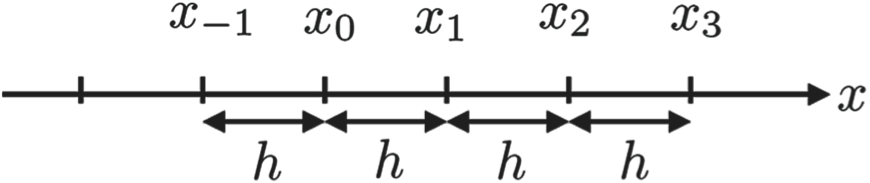


### Basic case forward diff

The first case we'll consider is the basic forward difference approximation
$$f'(x_i) \approx \frac{f(x_{i+1}) - f(x_i)}{x_{i+1}-x_i} = \frac{f(x_{i+1}) - f(x_i)}{h}.$$

- How is this related to the definition of the derivative?
- Expand $f(x_{i+1})$ in a Taylor expansion about $x_i$.
- What is the order of accuracy for this method, i.e. the method's truncation error is $\mathcal{O}(h^p)$ for what value of $p$?


### Example:
Let's verify our method's accuracy by comparing with a function with a known derivative.
- Pick a simple function (not polynomial) with a known derivative.
- Create a grid of evenly spaced points in the domain of this function.
 - Make sure to note the $h$ you use here.
- Calculate the numerical derivative using the forward diff model. 
 - How will you deal with endpoint(s)?
- Create an array of exact values of this derivative.
- Compare the approximation with the exact array. How different are they?
 - How do you measure the difference between two arrays?
- Record this difference and $h$ value.
- Repeat the steps above with $h \to h/10, h/100, h/1000$.
 - Make a plot of error against $h$ on a loglog scale. What should you see? Do you see this?


0.0007999999854308459


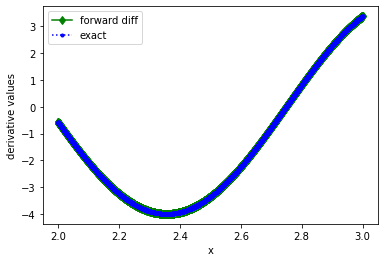

In [12]:
h = 0.0001
x = np.linspace(2.,3.,10001)
fx = np.sin(4.*x) + 3.
fpx_exact = 4.*np.cos(4.*x)

fpx_approx = np.zeros(len(x)-1)

for i in range(len(fpx_approx)):
    fpx_approx[i] = (fx[i+1] - fx[i])/h

plt.plot(x[:-1],fpx_approx,'gd-',x[:-1],fpx_exact[:-1],'b.:');
plt.xlabel('x');
plt.ylabel('derivative values');
plt.legend(['forward diff','exact']);

error = fpx_approx - fpx_exact[:-1]
maxerror = np.max(error)
print(maxerror)

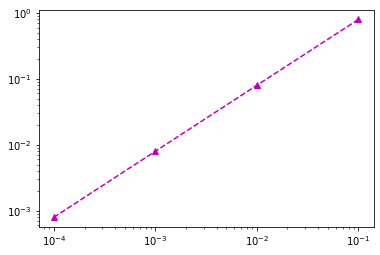

In [14]:
hs = np.array([0.1,0.01,0.001,0.0001])
errors = np.array([0.7949,0.079983,0.0079999,0.0007999999])

plt.loglog(hs,errors,'m^--');

### Center difference approximation
Repeat the examples above with the center difference approximation
$$f'(x_i) \approx \frac{x_{i+1} - x_{i-1}}{2h}.$$
Be sure to work from Taylor expansion all the way through loglog plot of error vs $h$.


1.0667609906533926e-07


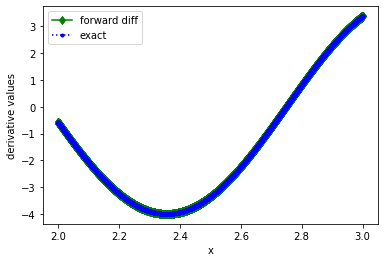

In [18]:
h = 0.0001
x = np.linspace(2.,3.,10001)
fx = np.sin(4.*x) + 3.
fpx_exact = 4.*np.cos(4.*x)

fpx_approx = np.zeros(len(x)-2)

for i in range(len(fpx_approx)):
    j = i+1
    fpx_approx[i] = (fx[j+1] - fx[j-1])/(2*h)

plt.plot(x[1:-1],fpx_approx,'gd-',x[1:-1],fpx_exact[1:-1],'b.:');
plt.xlabel('x');
plt.ylabel('derivative values');
plt.legend(['forward diff','exact']);

error = fpx_approx - fpx_exact[1:-1]
maxerror = np.max(error)
print(maxerror)

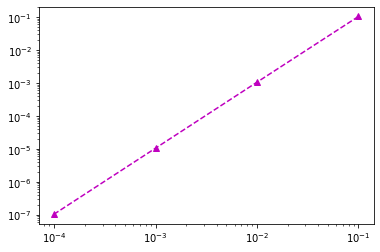

In [19]:
hs = np.array([0.1,0.01,0.001,0.0001])
errors = np.array([0.10419,0.00106,1.06E-5,1.06E-7])

plt.loglog(hs,errors,'m^--');

### Example: tailing pond filling

The rate of evaporation in a reservoir depends on its surface area. For many ponds with industrial uses keeping track of evaporation is important as it plays into the concentration of chemicals found in the water. Often because of geography and other considerations, it is impractible to collect volume and surface area data directly and is much easier to collect data about reference depths and volumetric flows. Consider an industrial pond that is filling for 24 hours. The flow sensor data and gauge heights are shown in the table below. Determine the surface area of the pond over the course of the 24 hours. (hint: you'll need numerical differentiation somewhere here)

| $t_k$ | $q_k$ (x10^-5)| $x_k$ |
|-------|---------------|-------|
| 0.0   | 1.49                 | 8.1   |
| 1.0   | 1.34                 | 21.6  |
| 2.0   | 1.41                 | 30.4  |
| 3.0   | 1.64                 | 38.1  |
| 4.0   | 1.49                 | 45.1  |
| 5.0   | 1.71                 | 50.7  |
| 6.0   | 1.80                 | 57.1  |
| 7.0   | 1.79                 | 62.5  |
| 8.0   | 2.18                 | 68.3  |
| 9.0   | 2.26                 | 74.3  |
| 10.0  | 1.90                 | 79.9  |
| 11.0  | 2.15                 | 84.3  |
| 12.0  | 2.16                 | 89.9  |
| 13.0  | 2.15                 | 94.2  |
| 14.0  | 2.32                 | 99.4  |
| 15.0  | 2.22                 | 104.0 |
| 16.0  | 1.98                 | 108.5 |
| 17.0  | 2.08                 | 112.3 |
| 18.0  | 1.98                 | 116.6 |
| 19.0  | 1.63                 | 119.6 |
| 20.0  | 1.52                 | 123.0 |
| 21.0  | 1.52                 | 125.4 |
| 22.0  | 1.34                 | 128.4 |
| 23.0  | 1.31                 | 130.4 |
| 24.0  | 1.42                 | 133.3 |

[11.15  8.25  7.35  6.3   6.    5.9   5.6   5.9   5.8   5.    5.    4.95
  4.75  4.9   4.55  4.15  4.05  3.65  3.2   2.9   2.7   2.5   2.45]


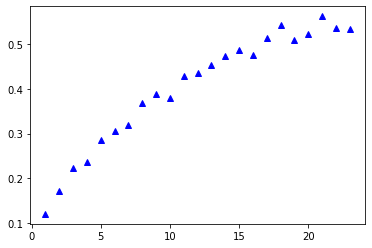

In [8]:
data = np.loadtxt('tailing.csv', delimiter=',',skiprows=0)
ts = data[:,0]
qs = data[:,1]
xs = data[:,2]

dxdt = np.zeros(len(xs)-2)

for i in range(0,len(dxdt)):
    dxdt[i] = (xs[i+2]-xs[i])/(ts[i+2]-ts[i])

print(dxdt)    
A = qs[1:-1]/dxdt

plt.plot(ts[1:-1],A,'b^');

### 2nd order center diff formula
We can approximate higher order derivatives in the same way as first order.
Consider the center difference formula on an equally spaced grid for the 2nd derivative below.
$$f''(x_i) \approx \frac{f(x_{i-1}) - 2f(x_i) + f(x_{i+1})}{h^2}$$
- Use Taylor expansions about $x_i$ to determine the order of accuracy of this method.
- Verify using a function with a known 2nd derivative and a loglog plot of error vs $h$.

3.6261122104974675e-07


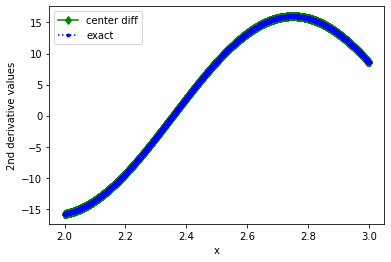

In [14]:
h = 0.0001
x = np.linspace(2.,3.,10001)
fx = np.sin(4.*x) + 3.
f2px_exact = -16.*np.sin(4.*x)

f2px_approx = np.zeros(len(x)-2)

for i in range(len(f2px_approx)):
    j = i+1  #shift in index when we chop off front and back
    f2px_approx[i] = (fx[j+1] - 2.*fx[j] + fx[j-1])/(h**2)

plt.plot(x[1:-1],f2px_approx,'gd-',x[1:-1],f2px_exact[1:-1],'b.:');
plt.xlabel('x');
plt.ylabel('2nd derivative values');
plt.legend(['center diff','exact']);

error = f2px_approx - f2px_exact[1:-1]
maxerror = np.max(error)
print(maxerror)

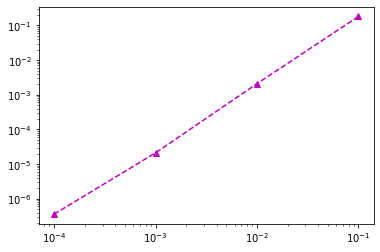

In [15]:
hs = np.array([0.1,0.01,0.001,0.0001])
errors = np.array([0.18134,0.00209,2.109e-5,3.6e-7])

plt.loglog(hs,errors,'m^--');